In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
zoo = pd.read_csv(r"C:\Users\ACS\OneDrive\Desktop\data sets\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
zoo.drop(columns=['feathers','airborne','backbone','breathes','venomous','fins','domestic'],inplace=True)
#dropped columns with no content in IQR

In [5]:
zoo

,animal name,hair,eggs,milk,aquatic,predator,toothed,legs,tail,catsize,type
0,aardvark,1,0,1,0,1,1,4,0,1,1
1,antelope,1,0,1,0,0,1,4,1,1,1
2,bass,0,1,0,1,1,1,0,1,0,4
3,bear,1,0,1,0,1,1,4,0,1,1
4,boar,1,0,1,0,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,1,0,0,1,2,1,1,1
97,wasp,1,1,0,0,0,0,6,0,0,6
98,wolf,1,0,1,0,1,1,4,1,1,1
99,worm,0,1,0,0,0,0,0,0,0,7


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   eggs         101 non-null    int64 
 3   milk         101 non-null    int64 
 4   aquatic      101 non-null    int64 
 5   predator     101 non-null    int64 
 6   toothed      101 non-null    int64 
 7   legs         101 non-null    int64 
 8   tail         101 non-null    int64 
 9   catsize      101 non-null    int64 
 10  type         101 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 8.8+ KB


In [7]:
zoo.duplicated().sum()

1

In [8]:
zoo.drop_duplicates(inplace=True)   #removed duplicated values

In [9]:
zoo.isna().sum() #no null values

animal name    0
hair           0
eggs           0
milk           0
aquatic        0
predator       0
toothed        0
legs           0
tail           0
catsize        0
type           0
dtype: int64

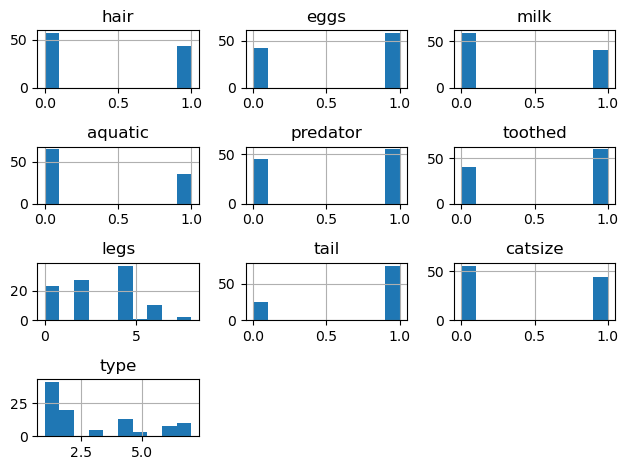

In [10]:
import matplotlib.pyplot as plt
zoo.hist()
plt.tight_layout()          #there are few outliers

<Axes: >

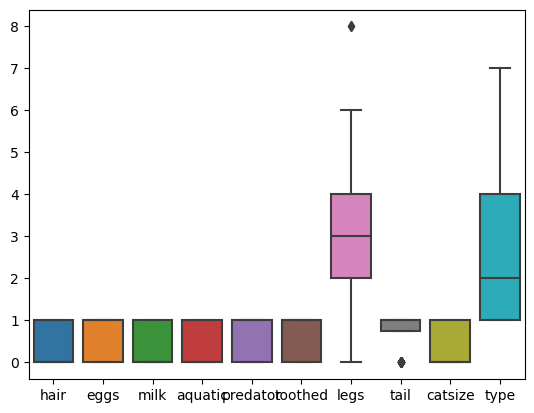

In [11]:
sns.boxplot(zoo)   #few outliers spotted

<Axes: xlabel='legs'>

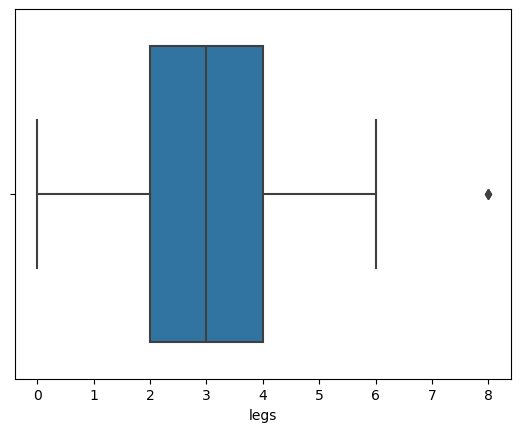

In [12]:
sns.boxplot(x=zoo['legs'])

In [13]:
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [14]:
outlier_detection(zoo,['legs','tail'])

(legs   -1.000
 tail    0.375
 dtype: float64,
 legs    7.000
 tail    1.375
 dtype: float64)

In [15]:
zoo.loc[zoo['legs']>7.000,'legs'] = 7.000
zoo.loc[zoo['tail']<0.375,'tail'] = 0.375

C:\Users\ACS\AppData\Local\Temp\ipykernel_18112\2414411270.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  zoo.loc[zoo['tail']<0.375,'tail'] = 0.375


<Axes: xlabel='legs'>

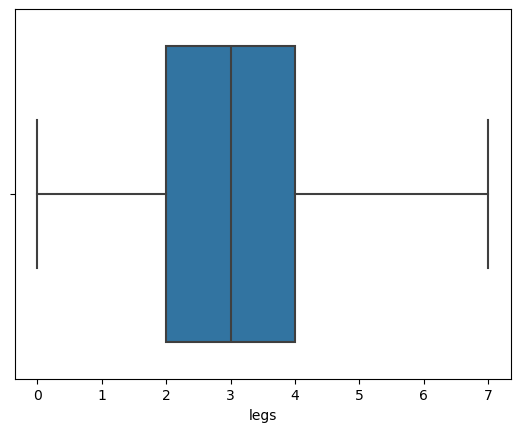

In [16]:
sns.boxplot(x=zoo['legs'])  #outliers treated

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

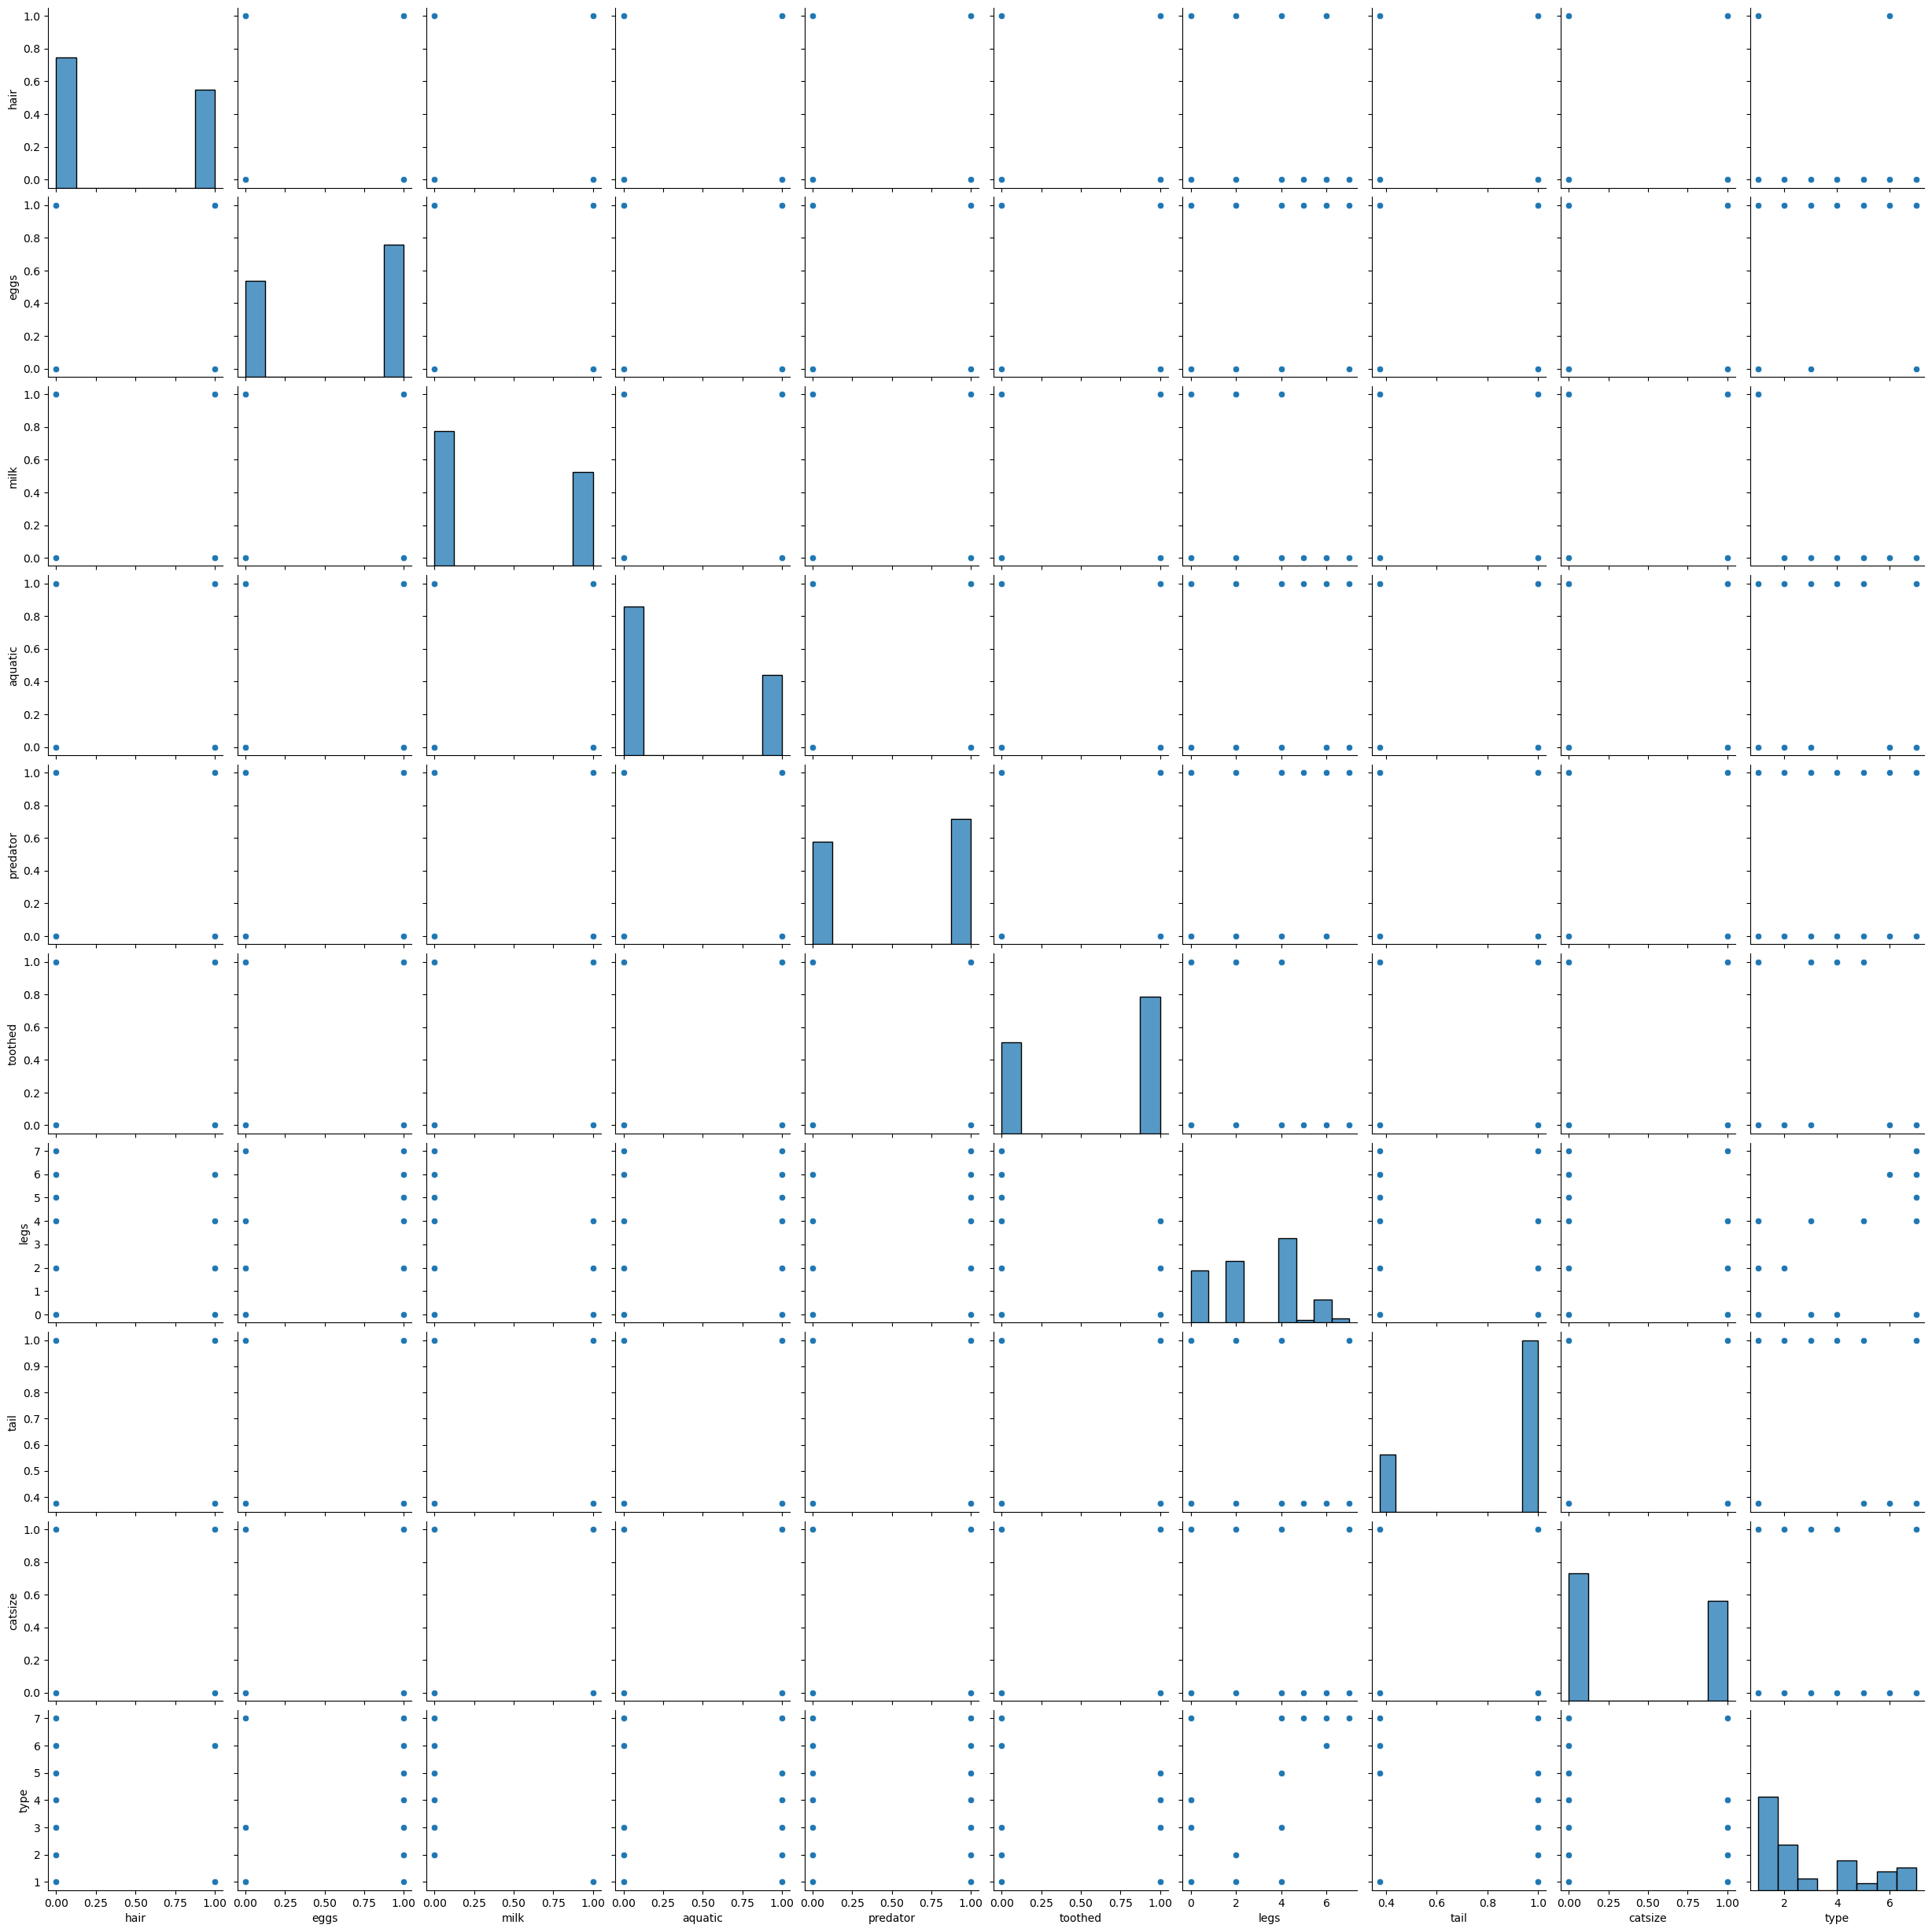

In [17]:
sns.pairplot(zoo)   #there is no specific pattern or relation. all points are on extreme

In [18]:
from sklearn.preprocessing import LabelEncoder   #encoded animal name
le = LabelEncoder()
zoo['animal name'] = le.fit_transform(zoo['animal name'])
zoo


,animal name,hair,eggs,milk,aquatic,predator,toothed,legs,tail,catsize,type
0,0,1,0,1,0,1,1,4,0.375,1,1
1,1,1,0,1,0,0,1,4,1.000,1,1
2,2,0,1,0,1,1,1,0,1.000,0,4
3,3,1,0,1,0,1,1,4,0.375,1,1
4,4,1,0,1,0,1,1,4,1.000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,1,0,0,1,2,1.000,1,1
97,96,1,1,0,0,0,0,6,0.375,0,6
98,97,1,0,1,0,1,1,4,1.000,1,1
99,98,0,1,0,0,0,0,0,0.375,0,7


In [19]:
array =  zoo.values
X = array[:,0:10]
Y = array[:,10]

In [20]:
#apply minmax scaling
X=(X-X.min())/(X.max())-X.min()

In [21]:
X

array([[0.        , 0.01010101, 0.        , 0.01010101, 0.        ,
        0.01010101, 0.01010101, 0.04040404, 0.00378788, 0.01010101],
       [0.01010101, 0.01010101, 0.        , 0.01010101, 0.        ,
        0.        , 0.01010101, 0.04040404, 0.01010101, 0.01010101],
       [0.02020202, 0.        , 0.01010101, 0.        , 0.01010101,
        0.01010101, 0.01010101, 0.        , 0.01010101, 0.        ],
       [0.03030303, 0.01010101, 0.        , 0.01010101, 0.        ,
        0.01010101, 0.01010101, 0.04040404, 0.00378788, 0.01010101],
       [0.04040404, 0.01010101, 0.        , 0.01010101, 0.        ,
        0.01010101, 0.01010101, 0.04040404, 0.01010101, 0.01010101],
       [0.05050505, 0.01010101, 0.        , 0.01010101, 0.        ,
        0.        , 0.01010101, 0.04040404, 0.01010101, 0.01010101],
       [0.06060606, 0.01010101, 0.        , 0.01010101, 0.        ,
        0.        , 0.01010101, 0.04040404, 0.01010101, 0.01010101],
       [0.07070707, 0.        , 0.0101010

In [22]:
num_folds = 10
kfold = KFold(n_splits = num_folds)

In [23]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
model = KNeighborsClassifier(n_neighbors=17)
model.fit(X_train,Y_train)
ypred = model.predict(X_test)
print(classification_report(Y_test , ypred))
print('Train Accuracy :',model.score(X_train,Y_train))
print('Test Accuracy:', model.score(X_test,Y_test))

              precision    recall  f1-score   support

         1.0       0.26      1.00      0.42         5
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         5

    accuracy                           0.25        20
   macro avg       0.04      0.17      0.07        20
weighted avg       0.07      0.25      0.10        20

Train Accuracy : 0.45
Test Accuracy: 0.25


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

**Grid Search Algorithm for Hyperparameter Tuning **

In [24]:
#Grid Search algorithm Tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
#n_neighbors = np.array(range(1,40)) # k=1 to 39 all numbers even and odd will be considered
n_neighbors = np.array([2*i+i for i in range(0,20)]) #only odd number of clusters (1 3 5 7 ... 39) will be considered
param_grid = dict(n_neighbors = n_neighbors)

In [26]:
param_grid

{'n_neighbors': array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
        51, 54, 57])}

In [27]:
n_neighbors

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57])

In [28]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model ,param_grid=param_grid)
grid.fit(X_train ,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.45
{'n_neighbors': 3}


**Visualizing the CV results**

In [30]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 41)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

39    0.41
38    0.41
37    0.41
36    0.41
35    0.41
34    0.40
33    0.40
32    0.39
31    0.39
30    0.38
29    0.38
28    0.38
27    0.38
26    0.37
25    0.36
24    0.36
23    0.36
22    0.35
21    0.35
3     0.33
2     0.33
19    0.32
0     0.30
20    0.30
18    0.30
17    0.29
16    0.28
9     0.28
10    0.27
1     0.27
6     0.27
12    0.26
7     0.24
5     0.24
4     0.24
15    0.21
8     0.21
13    0.21
11    0.21
14    0.20
dtype: float64

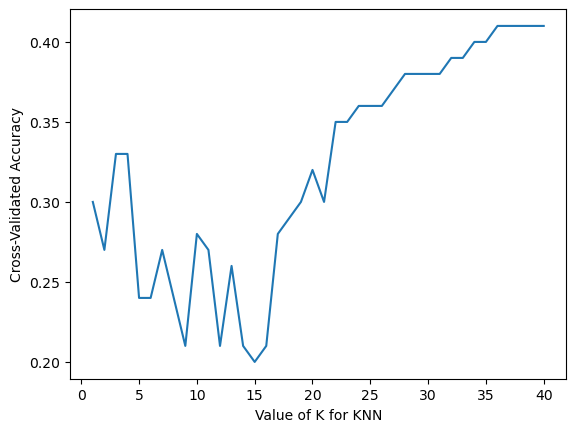

In [31]:
import matplotlib.pyplot as plt

# plot to see clearly
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

**1)The most important hyperparameter for KNN is the number of neighbors (n_neighbors).**

**2)Commonly used distance metrics for optimizing K-Nearest Neighbors (KNN) algorithms include Euclidean distance and Cosine similarity. Euclidean distance measures the straight-line distance between two points, suitable for continuous features.**